In [1]:
import warnings
warnings.filterwarnings('ignore')
import dynamo as dyn
import pandas as pd
import numpy as np
import anndata

In [2]:
dyn.get_all_dependencies_version()

package       cvxopt anndata loompy      trimap numdifftools hdbscan  \
version  1.2.5.post1   0.7.5  3.0.6  1.4.3.dev1       0.9.39  0.8.26   

package statsmodels   numba seaborn colorcet    tqdm python-igraph  \
version      0.12.1  0.52.0  0.11.1    2.0.2  4.56.0         0.8.3   

package pynndescent dynamo-release matplotlib   numpy pandas scikit-learn  \
version       0.5.1         0.95.2      3.3.3  1.19.3  1.2.0       0.24.0   

package  scipy setuptools umap-learn  
version  1.6.0     49.2.1      0.4.6

In [3]:
dyn.configuration.set_figure_params('dynamo', background='white')

In [4]:
X = pd.read_csv('data/export-hs4-pivot.csv')

In [5]:
#X_new => 2019
X_new = X.loc[X['year_at'] == 2019]
X_new = X_new.drop(['year_at'], axis=1)
X_new = X_new.set_index(['exporter'])
X_new

0101   0102  0103  0104    0105    0106   0201  \
exporter                                                                    
Afghanistan                 0.0    0.0   0.0  35.0     0.0     3.0    0.0   
Albania                     0.0    0.0   0.0  31.0     0.0   815.0  278.0   
Algeria                     0.0    0.0   0.0   0.0     0.0    14.0    0.0   
American Samoa              0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Andorra                    48.0  123.0   0.0  15.0     0.0     8.0    0.0   
...                         ...    ...   ...   ...     ...     ...    ...   
Wallis and Futuna Islands   0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Western Sahara              0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Yemen                       0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Zambia                     18.0   30.0   8.0   1.0  7349.0   142.0  157.0   
Zimbabwe                   24.0   64.0   0.0   0.0  1722.0  1240.0    0.0   

                            0202   0203   0204   0205   0206     0207    0208  \
exporter                                                                        
Afghanistan                  0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Albania                      0.0    0.0    0.0  281.0    0.0      6.0  1117.0   
Algeria                     91.0    0.0    0.0    0.0    0.0   1379.0     0.0   
American Samoa               3.0   18.0    0.0    0.0    0.0    385.0     4.0   
Andorra                      1.0    0.0    0.0    0.0   16.0     22.0     0.0   
...                          ...    ...    ...    ...    ...      ...     ...   
Wallis and Futuna Islands    0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Western Sahara               0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Yemen                        0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Zambia                     175.0  152.0    1.0    0.0  771.0  13112.0    94.0   
Zimbabwe                     0.0  211.0  203.0    0.0  775.0      0.0   720.0   

                           0209  0210    0301     0302     0303    0304  \
exporter                                                                  
Afghanistan                 0.0   0.0     0.0      0.0      0.0     0.0   
Albania                     0.0   0.0  1775.0   8676.0   2416.0   969.0   
Algeria                     0.0   0.0  6575.0    940.0    902.0  4866.0   
American Samoa              7.0   1.0     0.0      2.0      1.0     1.0   
Andorra                     0.0   0.0     0.0      0.0      1.0     0.0   
...                         ...   ...     ...      ...      ...     ...   
Wallis and Futuna Islands   0.0   0.0     0.0      0.0      0.0     0.0   
Western Sahara              0.0   0.0     0.0      0.0     61.0     0.0   
Yemen                       0.0   0.0    40.0  59011.0  36728.0  1746.0   
Zambia                      0.0   5.0     4.0     55.0   3383.0    67.0   
Zimbabwe                    0.0   0.0   293.0      0.0   5865.0   371.0   

                              0305    0306     0307     0308    0401    0402  \
exporter                                                                       
Afghanistan                    0.0     0.0      0.0      0.0     0.0     0.0   
Albania                    20131.0  3648.0   7669.0     43.0     0.0     0.0   
Algeria                       15.0  2266.0  14609.0     19.0    10.0  4137.0   
American Samoa                 0.0     0.0      0.0      0.0     0.0     5.0   
Andorra                        0.0     0.0      0.0      0.0     1.0     0.0   
...                            ...     ...      ...      ...     ...     ...   
Wallis and Futuna Islands      0.0     0.0      0.0      0.0     0.0     0.0   
Western Sahara                 0.0     0.0      0.0      0.0     0.0     0.0   
Yemen                       4102.0  6953.0  25266.0  10842.0  1035.0  3112.0   
Zambia                       385.0     0.0      0.0      1.0   114.0  1702.0   
Zimbabwe                       1.0 

In [6]:
#X_old => 2018
X_old = X.loc[X['year_at'] == 2018]
X_old = X_old.drop(['year_at'], axis=1)
X_old = X_old.set_index(['exporter'])
X_old

0101   0102  0103   0104    0105   0106  0201  \
exporter                                                                   
Afghanistan                 0.0    0.0   0.0    3.0     0.0    0.0   0.0   
Albania                     0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Algeria                    57.0    0.0   0.0    0.0     0.0    0.0   0.0   
American Samoa              0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Andorra                    34.0    0.0   0.0    0.0     0.0    0.0   0.0   
...                         ...    ...   ...    ...     ...    ...   ...   
Wallis and Futuna Islands   0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Western Sahara              0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Yemen                       0.0    0.0   0.0  515.0     0.0    0.0   0.0   
Zambia                     12.0  129.0   0.0    0.0  5514.0   79.0   1.0   
Zimbabwe                   22.0   70.0   3.0    0.0   148.0  348.0   0.0   

                           0202   0203   0204  0205   0206    0207   0208  \
exporter                                                                    
Afghanistan                 0.0    0.0  340.0   0.0    0.0     0.0    0.0   
Albania                     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Algeria                     3.0  108.0    0.0   0.0    0.0   426.0    0.0   
American Samoa              0.0    0.0    0.0   0.0    0.0   276.0    1.0   
Andorra                     3.0    0.0    0.0   0.0    0.0     0.0    0.0   
...                         ...    ...    ...   ...    ...     ...    ...   
Wallis and Futuna Islands   0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Western Sahara              0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Yemen                       0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Zambia                     40.0    6.0    2.0   0.0  133.0  2447.0   20.0   
Zimbabwe                    0.0    6.0    0.0   0.0    0.0     0.0  441.0   

                           0209  0210     0301     0302     0303    0304  \
exporter                                                                   
Afghanistan                 0.0   0.0      0.0      0.0      0.0     0.0   
Albania                     0.0   0.0      0.0    174.0    124.0     0.0   
Algeria                     0.0   0.0  10141.0    778.0    578.0  1982.0   
American Samoa              0.0   1.0      2.0      0.0      0.0     0.0   
Andorra                     0.0   8.0      0.0      0.0      0.0     0.0   
...                         ...   ...      ...      ...      ...     ...   
Wallis and Futuna Islands   0.0   0.0      0.0      0.0      0.0     0.0   
Western Sahara              0.0   0.0      0.0     41.0      0.0     0.0   
Yemen                       0.0   0.0      1.0  53425.0  22662.0  1004.0   
Zambia                      0.0   1.0    103.0    196.0    282.0     0.0   
Zimbabwe                    0.0   3.0    235.0    460.0   5226.0   310.0   

                             0305     0306     0307     0308   0401    0402  \
exporter                                                                      
Afghanistan                   0.0      0.0      0.0      0.0    0.0     0.0   
Albania                       1.0    451.0    241.0      0.0    0.0     0.0   
Algeria                       0.0   2657.0  19447.0    168.0  108.0  1418.0   
American Samoa                0.0      0.0      0.0      0.0    0.0    28.0   
Andorra                       0.0      0.0      0.0      0.0    0.0     0.0   
...                           ...      ...      ...      ...    ...     ...   
Wallis and Futuna Islands     0.0      0.0      0.0      0.0    0.0     0.0   
Western Sahara                0.0      0.0      0.0      0.0    0.0     0.0   
Yemen                      6035.0  10368.0  40423.0  10491.0  188.0  6673.0   
Zambia                      240.0      0.0      0.0      0.0  182.0  1817.0   
Zimbabwe                      9.0      0.0      0.0      0.0  148.0    19.0   

                   

In [7]:
obs = pd.read_csv('countries.csv')
obs = obs.set_index('name')
obs

id           created_at           updated_at  \
name                                                                       
Afghanistan                  1  2021-01-06 05:28:44  2021-01-06 05:28:44   
Albania                      2  2021-01-06 05:28:45  2021-01-06 05:28:45   
Algeria                      3  2021-01-06 05:28:45  2021-01-06 05:28:45   
American Samoa               4  2021-01-06 05:28:45  2021-01-06 05:28:45   
Andorra                      5  2021-01-06 05:28:45  2021-01-06 05:28:45   
...                        ...                  ...                  ...   
Wallis and Futuna Islands  218  2021-01-06 05:29:04  2021-01-06 05:29:04   
Western Sahara             219  2021-01-06 05:29:04  2021-01-06 05:29:04   
Yemen                      220  2021-01-06 05:29:05  2021-01-06 05:29:05   
Zambia                     221  2021-01-06 05:29:05  2021-01-06 05:29:05   
Zimbabwe                   222  2021-01-06 05:29:05  2021-01-06 05:29:05   

                           code iso_code           iso_name  parentCode  \
name                                                                      
Afghanistan                   4       AF        Afghanistan          13   
Albania                       8       AL            Albania           6   
Algeria                      12       DZ            Algeria          11   
American Samoa               16       AS     American Samoa          12   
Andorra                      20       AD            Andorra           4   
...                         ...      ...                ...         ...   
Wallis and Futuna Islands   876       WF  Wallis and Futuna          12   
Western Sahara              732       EH     Western Sahara          11   
Yemen                       887       YE              Yemen           9   
Zambia                      894       ZM             Zambia          14   
Zimbabwe                    716       ZW           Zimbabwe          14   

                                           parentName  
name                                                   
Afghanistan                                South Asia  
Albania                    East Europe & Central Asia  
Algeria                               Northern Africa  
American Samoa                                Pacific  
Andorra                              EU & West Europe  
...                                               ...  
Wallis and Futuna Islands                     Pacific  
Western Sahara                        Northern Africa  
Yemen                                     Middle East  
Zambia                                Southern Africa  
Zimbabwe                              Southern Africa  

[222 rows x 8 columns]

In [8]:
intersect_obs = list(set(list(X_new.index)) & set(list(X_old.index)) & set(list(obs.index)))
intersect_obs.sort()
intersect_obs

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia, Plurinational State of',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, Democratic Republic of the',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eri

In [9]:
filtered_X_new = X_new.loc[intersect_obs]
filtered_X_new

0101   0102  0103  0104    0105    0106   0201  \
exporter                                                                    
Afghanistan                 0.0    0.0   0.0  35.0     0.0     3.0    0.0   
Albania                     0.0    0.0   0.0  31.0     0.0   815.0  278.0   
Algeria                     0.0    0.0   0.0   0.0     0.0    14.0    0.0   
American Samoa              0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Andorra                    48.0  123.0   0.0  15.0     0.0     8.0    0.0   
...                         ...    ...   ...   ...     ...     ...    ...   
Wallis and Futuna Islands   0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Western Sahara              0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Yemen                       0.0    0.0   0.0   0.0     0.0     0.0    0.0   
Zambia                     18.0   30.0   8.0   1.0  7349.0   142.0  157.0   
Zimbabwe                   24.0   64.0   0.0   0.0  1722.0  1240.0    0.0   

                            0202   0203   0204   0205   0206     0207    0208  \
exporter                                                                        
Afghanistan                  0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Albania                      0.0    0.0    0.0  281.0    0.0      6.0  1117.0   
Algeria                     91.0    0.0    0.0    0.0    0.0   1379.0     0.0   
American Samoa               3.0   18.0    0.0    0.0    0.0    385.0     4.0   
Andorra                      1.0    0.0    0.0    0.0   16.0     22.0     0.0   
...                          ...    ...    ...    ...    ...      ...     ...   
Wallis and Futuna Islands    0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Western Sahara               0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Yemen                        0.0    0.0    0.0    0.0    0.0      0.0     0.0   
Zambia                     175.0  152.0    1.0    0.0  771.0  13112.0    94.0   
Zimbabwe                     0.0  211.0  203.0    0.0  775.0      0.0   720.0   

                           0209  0210    0301     0302     0303    0304  \
exporter                                                                  
Afghanistan                 0.0   0.0     0.0      0.0      0.0     0.0   
Albania                     0.0   0.0  1775.0   8676.0   2416.0   969.0   
Algeria                     0.0   0.0  6575.0    940.0    902.0  4866.0   
American Samoa              7.0   1.0     0.0      2.0      1.0     1.0   
Andorra                     0.0   0.0     0.0      0.0      1.0     0.0   
...                         ...   ...     ...      ...      ...     ...   
Wallis and Futuna Islands   0.0   0.0     0.0      0.0      0.0     0.0   
Western Sahara              0.0   0.0     0.0      0.0     61.0     0.0   
Yemen                       0.0   0.0    40.0  59011.0  36728.0  1746.0   
Zambia                      0.0   5.0     4.0     55.0   3383.0    67.0   
Zimbabwe                    0.0   0.0   293.0      0.0   5865.0   371.0   

                              0305    0306     0307     0308    0401    0402  \
exporter                                                                       
Afghanistan                    0.0     0.0      0.0      0.0     0.0     0.0   
Albania                    20131.0  3648.0   7669.0     43.0     0.0     0.0   
Algeria                       15.0  2266.0  14609.0     19.0    10.0  4137.0   
American Samoa                 0.0     0.0      0.0      0.0     0.0     5.0   
Andorra                        0.0     0.0      0.0      0.0     1.0     0.0   
...                            ...     ...      ...      ...     ...     ...   
Wallis and Futuna Islands      0.0     0.0      0.0      0.0     0.0     0.0   
Western Sahara                 0.0     0.0      0.0      0.0     0.0     0.0   
Yemen                       4102.0  6953.0  25266.0  10842.0  1035.0  3112.0   
Zambia                       385.0     0.0      0.0      1.0   114.0  1702.0   
Zimbabwe                       1.0 

In [10]:
filtered_X_old = X_old.loc[intersect_obs]
filtered_X_old

0101   0102  0103   0104    0105   0106  0201  \
exporter                                                                   
Afghanistan                 0.0    0.0   0.0    3.0     0.0    0.0   0.0   
Albania                     0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Algeria                    57.0    0.0   0.0    0.0     0.0    0.0   0.0   
American Samoa              0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Andorra                    34.0    0.0   0.0    0.0     0.0    0.0   0.0   
...                         ...    ...   ...    ...     ...    ...   ...   
Wallis and Futuna Islands   0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Western Sahara              0.0    0.0   0.0    0.0     0.0    0.0   0.0   
Yemen                       0.0    0.0   0.0  515.0     0.0    0.0   0.0   
Zambia                     12.0  129.0   0.0    0.0  5514.0   79.0   1.0   
Zimbabwe                   22.0   70.0   3.0    0.0   148.0  348.0   0.0   

                           0202   0203   0204  0205   0206    0207   0208  \
exporter                                                                    
Afghanistan                 0.0    0.0  340.0   0.0    0.0     0.0    0.0   
Albania                     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Algeria                     3.0  108.0    0.0   0.0    0.0   426.0    0.0   
American Samoa              0.0    0.0    0.0   0.0    0.0   276.0    1.0   
Andorra                     3.0    0.0    0.0   0.0    0.0     0.0    0.0   
...                         ...    ...    ...   ...    ...     ...    ...   
Wallis and Futuna Islands   0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Western Sahara              0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Yemen                       0.0    0.0    0.0   0.0    0.0     0.0    0.0   
Zambia                     40.0    6.0    2.0   0.0  133.0  2447.0   20.0   
Zimbabwe                    0.0    6.0    0.0   0.0    0.0     0.0  441.0   

                           0209  0210     0301     0302     0303    0304  \
exporter                                                                   
Afghanistan                 0.0   0.0      0.0      0.0      0.0     0.0   
Albania                     0.0   0.0      0.0    174.0    124.0     0.0   
Algeria                     0.0   0.0  10141.0    778.0    578.0  1982.0   
American Samoa              0.0   1.0      2.0      0.0      0.0     0.0   
Andorra                     0.0   8.0      0.0      0.0      0.0     0.0   
...                         ...   ...      ...      ...      ...     ...   
Wallis and Futuna Islands   0.0   0.0      0.0      0.0      0.0     0.0   
Western Sahara              0.0   0.0      0.0     41.0      0.0     0.0   
Yemen                       0.0   0.0      1.0  53425.0  22662.0  1004.0   
Zambia                      0.0   1.0    103.0    196.0    282.0     0.0   
Zimbabwe                    0.0   3.0    235.0    460.0   5226.0   310.0   

                             0305     0306     0307     0308   0401    0402  \
exporter                                                                      
Afghanistan                   0.0      0.0      0.0      0.0    0.0     0.0   
Albania                       1.0    451.0    241.0      0.0    0.0     0.0   
Algeria                       0.0   2657.0  19447.0    168.0  108.0  1418.0   
American Samoa                0.0      0.0      0.0      0.0    0.0    28.0   
Andorra                       0.0      0.0      0.0      0.0    0.0     0.0   
...                           ...      ...      ...      ...    ...     ...   
Wallis and Futuna Islands     0.0      0.0      0.0      0.0    0.0     0.0   
Western Sahara                0.0      0.0      0.0      0.0    0.0     0.0   
Yemen                      6035.0  10368.0  40423.0  10491.0  188.0  6673.0   
Zambia                      240.0      0.0      0.0      0.0  182.0  1817.0   
Zimbabwe                      9.0      0.0      0.0      0.0  148.0    19.0   

                   

In [11]:
filtered_obs = obs.loc[intersect_obs]
filtered_obs

id           created_at           updated_at  \
name                                                                       
Afghanistan                  1  2021-01-06 05:28:44  2021-01-06 05:28:44   
Albania                      2  2021-01-06 05:28:45  2021-01-06 05:28:45   
Algeria                      3  2021-01-06 05:28:45  2021-01-06 05:28:45   
American Samoa               4  2021-01-06 05:28:45  2021-01-06 05:28:45   
Andorra                      5  2021-01-06 05:28:45  2021-01-06 05:28:45   
...                        ...                  ...                  ...   
Wallis and Futuna Islands  218  2021-01-06 05:29:04  2021-01-06 05:29:04   
Western Sahara             219  2021-01-06 05:29:04  2021-01-06 05:29:04   
Yemen                      220  2021-01-06 05:29:05  2021-01-06 05:29:05   
Zambia                     221  2021-01-06 05:29:05  2021-01-06 05:29:05   
Zimbabwe                   222  2021-01-06 05:29:05  2021-01-06 05:29:05   

                           code iso_code           iso_name  parentCode  \
name                                                                      
Afghanistan                   4       AF        Afghanistan          13   
Albania                       8       AL            Albania           6   
Algeria                      12       DZ            Algeria          11   
American Samoa               16       AS     American Samoa          12   
Andorra                      20       AD            Andorra           4   
...                         ...      ...                ...         ...   
Wallis and Futuna Islands   876       WF  Wallis and Futuna          12   
Western Sahara              732       EH     Western Sahara          11   
Yemen                       887       YE              Yemen           9   
Zambia                      894       ZM             Zambia          14   
Zimbabwe                    716       ZW           Zimbabwe          14   

                                           parentName  
name                                                   
Afghanistan                                South Asia  
Albania                    East Europe & Central Asia  
Algeria                               Northern Africa  
American Samoa                                Pacific  
Andorra                              EU & West Europe  
...                                               ...  
Wallis and Futuna Islands                     Pacific  
Western Sahara                        Northern Africa  
Yemen                                     Middle East  
Zambia                                Southern Africa  
Zimbabwe                              Southern Africa  

[219 rows x 8 columns]

In [12]:
var = pd.DataFrame(np.array(X.columns)[2:], columns=['hscode'])
var = var.set_index('hscode')
var

Empty DataFrame
Columns: []
Index: [0101, 0102, 0103, 0104, 0105, 0106, 0201, 0202, 0203, 0204, 0205, 0206, 0207, 0208, 0209, 0210, 0301, 0302, 0303, 0304, 0305, 0306, 0307, 0308, 0401, 0402, 0403, 0404, 0405, 0406, 0407, 0408, 0409, 0410, 0501, 0502, 0503, 0504, 0505, 0506, 0507, 0508, 0509, 0510, 0511, 0601, 0602, 0603, 0604, 0701, 0702, 0703, 0704, 0705, 0706, 0707, 0708, 0709, 0710, 0711, 0712, 0713, 0714, 0801, 0802, 0803, 0804, 0805, 0806, 0807, 0808, 0809, 0810, 0811, 0812, 0813, 0814, 0901, 0902, 0903, 0904, 0905, 0906, 0907, 0908, 0909, 0910, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1101, 1102, 1103, 1104, 1105, ...]

[1258 rows x 0 columns]

In [13]:
layers = {
    "spliced" : filtered_X_new.to_numpy(),
    "unspliced" : filtered_X_old.to_numpy(),
}
adata = anndata.AnnData(X=filtered_X_new.to_numpy(), obs=filtered_obs,var=var, layers=layers)
adata

AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName'
    layers: 'spliced', 'unspliced'

In [14]:
dyn.pp.recipe_monocle(adata)

AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'

In [15]:
dyn.tl.dynamics(adata, model='stochastic', cores=8)

AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

<Figure size 600x400 with 0 Axes>

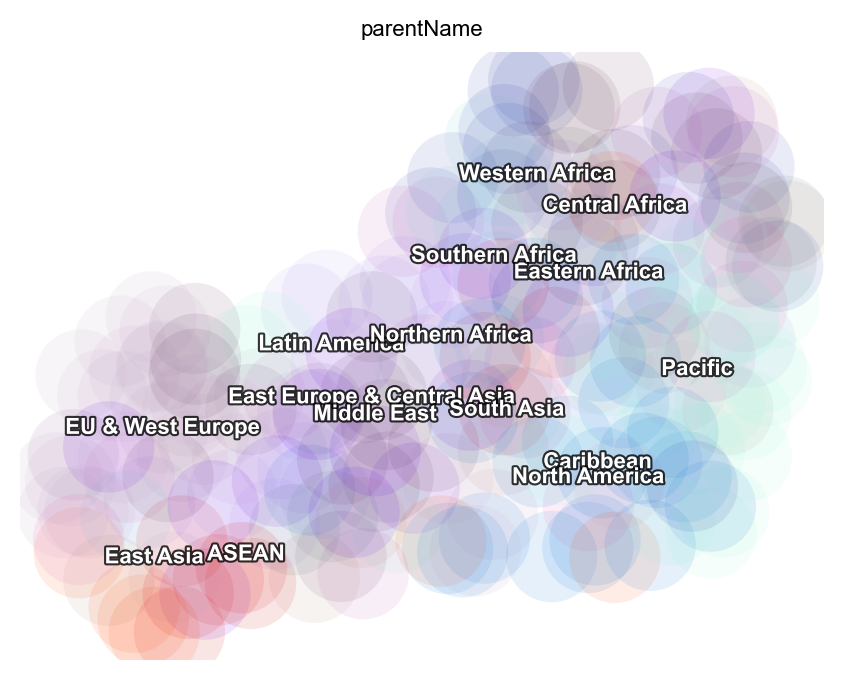

In [16]:
dyn.tl.reduceDimension(adata)

dyn.pl.umap(adata, color='parentName')

<Figure size 600x400 with 0 Axes>

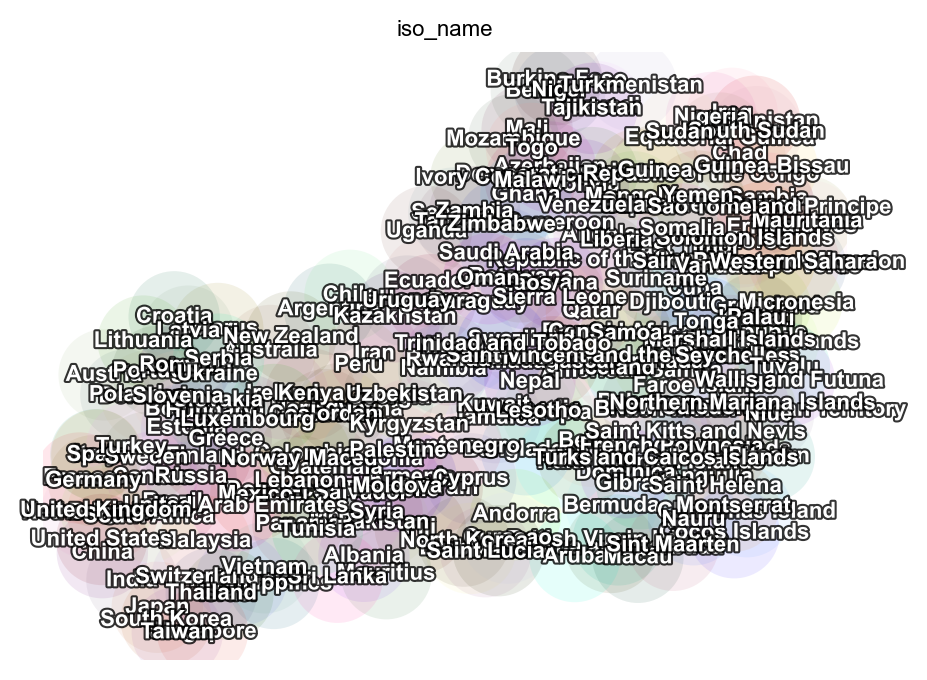

In [17]:
dyn.pl.umap(adata, color='iso_name')

In [18]:
adata

AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit'
    obsm: 'X_pca', 'X', 'X_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances'

In [19]:
# dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'})
dyn.tl.cell_velocities(adata)

calculating transition matrix via pearson kernel with sqrt transform.: 100%|██████████████████████████████████████████████████████████████| 219/219 [00:00<00:00, 299.79it/s]
projecting velocity vector to low dimensional embedding...: 100%|████████████████████████████████████████████████████████████████████████| 219/219 [00:00<00:00, 4291.08it/s]


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

In [20]:
# adata.obsm['velocity_umap'] = adata.obsm['velocity_umap'] +1;
# adata.obsm['X_umap'] = adata.obsm['X_umap'] +100;

<Figure size 600x400 with 0 Axes>

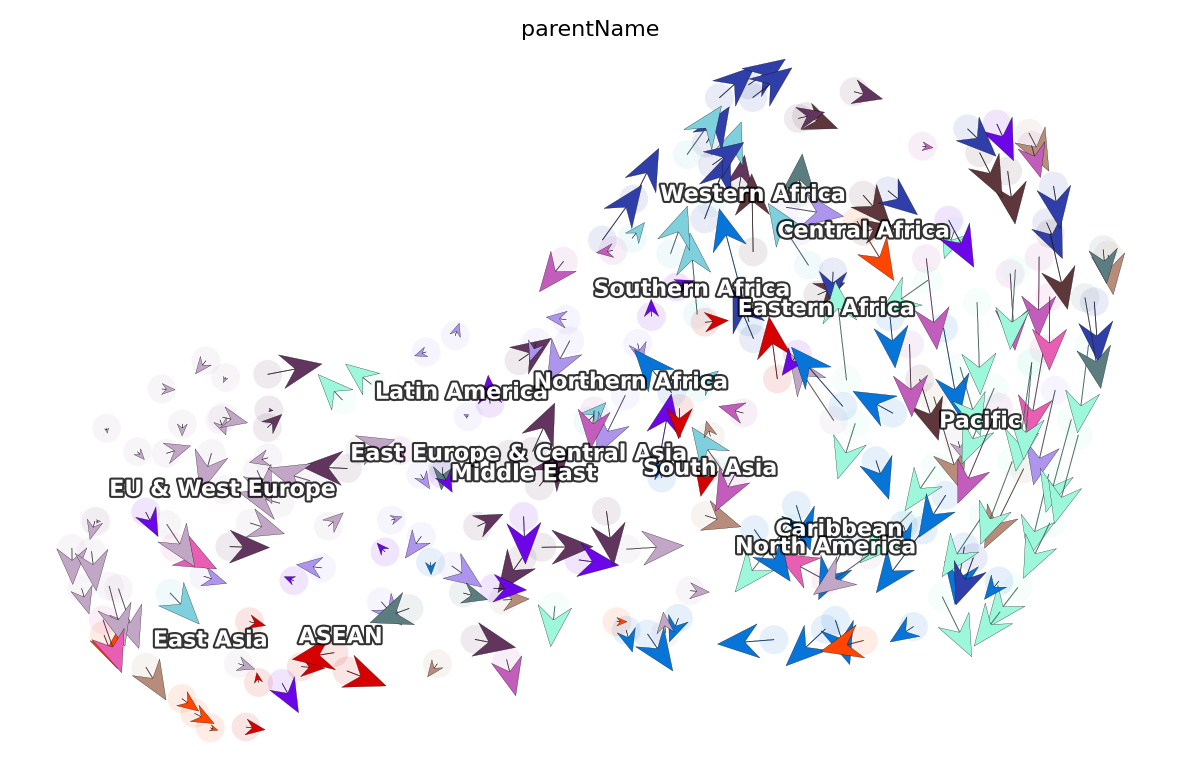

In [21]:
dyn.pl.cell_wise_vectors(adata, color=['parentName'], basis='umap', show_legend='on data', quiver_length=6, quiver_size=6, pointsize=0.1, show_arrowed_spines=False)

In [22]:
adata.uns.keys()

odict_keys(['pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'])

<Figure size 600x400 with 0 Axes>

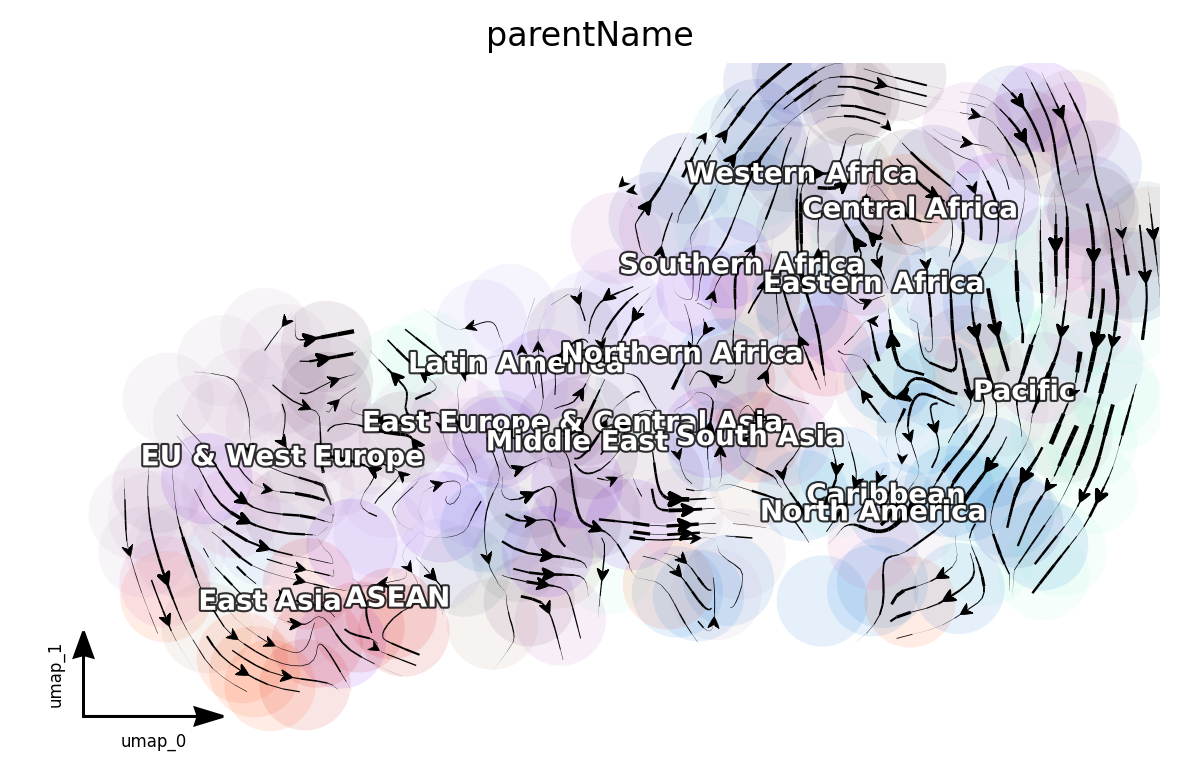

In [23]:
dyn.pl.streamline_plot(adata, color=['parentName'], basis='umap', show_legend='on data', show_arrowed_spines=True)

In [27]:
pieces = {'spliced': filtered_X_new, 'unspliced': filtered_X_old}

df_piece = pd.concat(pieces)
df_piece = df_piece.reset_index()
df_piece["key"] = df_piece["level_0"] + "_" + df_piece["exporter"]
df_piece

level_0                   exporter  0101   0102  0103   0104    0105  \
0      spliced                Afghanistan   0.0    0.0   0.0   35.0     0.0   
1      spliced                    Albania   0.0    0.0   0.0   31.0     0.0   
2      spliced                    Algeria   0.0    0.0   0.0    0.0     0.0   
3      spliced             American Samoa   0.0    0.0   0.0    0.0     0.0   
4      spliced                    Andorra  48.0  123.0   0.0   15.0     0.0   
..         ...                        ...   ...    ...   ...    ...     ...   
433  unspliced  Wallis and Futuna Islands   0.0    0.0   0.0    0.0     0.0   
434  unspliced             Western Sahara   0.0    0.0   0.0    0.0     0.0   
435  unspliced                      Yemen   0.0    0.0   0.0  515.0     0.0   
436  unspliced                     Zambia  12.0  129.0   0.0    0.0  5514.0   
437  unspliced                   Zimbabwe  22.0   70.0   3.0    0.0   148.0   

      0106   0201  0202  0203  0204   0205   0206    0207    0208  0209  0210  \
0      3.0    0.0   0.0   0.0   0.0    0.0    0.0     0.0     0.0   0.0   0.0   
1    815.0  278.0   0.0   0.0   0.0  281.0    0.0     6.0  1117.0   0.0   0.0   
2     14.0    0.0  91.0   0.0   0.0    0.0    0.0  1379.0     0.0   0.0   0.0   
3      0.0    0.0   3.0  18.0   0.0    0.0    0.0   385.0     4.0   7.0   1.0   
4      8.0    0.0   1.0   0.0   0.0    0.0   16.0    22.0     0.0   0.0   0.0   
..     ...    ...   ...   ...   ...    ...    ...     ...     ...   ...   ...   
433    0.0    0.0   0.0   0.0   0.0    0.0    0.0     0.0     0.0   0.0   0.0   
434    0.0    0.0   0.0   0.0   0.0    0.0    0.0     0.0     0.0   0.0   0.0   
435    0.0    0.0   0.0   0.0   0.0    0.0    0.0     0.0     0.0   0.0   0.0   
436   79.0    1.0  40.0   6.0   2.0    0.0  133.0  2447.0    20.0   0.0   1.0   
437  348.0    0.0   0.0   6.0   0.0    0.0    0.0     0.0   441.0   0.0   3.0   

       0301     0302     0303    0304     0305     0306     0307     0308  \
0       0.0      0.0      0.0     0.0      0.0      0.0      0.0      0.0   
1    1775.0   8676.0   2416.0   969.0  20131.0   3648.0   7669.0     43.0   
2    6575.0    940.0    902.0  4866.0     15.0   2266.0  14609.0     19.0   
3       0.0      2.0      1.0     1.0      0.0      0.0      0.0      0.0   
4       0.0      0.0      1.0     0.0      0.0      0.0      0.0      0.0   
..      ...      ...      ...     ...      ...      ...      ...      ...   
433     0.0      0.0      0.0     0.0      0.0      0.0      0.0      0.0   
434     0.0     41.0      0.0     0.0      0.0      0.0      0.0      0.0   
435     1.0  53425.0  22662.0  1004.0   6035.0  10368.0  40423.0  10491.0   
436   103.0    196.0    282.0     0.0    240.0      0.0      0.0      0.0   
437   235.0    460.0   5226.0   310.0      9.0      0.0      0.0      0.0   

      0401    0402    0403  0404   0405    0406    0407  0408     0409  0410  \
0      0.0     0.0    41.0   0.0    0.0    15.0     0.0   0.0      2.0   0.0   
1      0.0     0.0     3.0   9.0    2.0   380.0   936.0  33.0     12.0   0.0   
2     10.0  4137.0    64.0   2.0   35.0  2558.0    74.0   0.0      2.0   0.0   
3      0.0     5.0     0.0   0.0    0.0     1.0     0.0   0.0      0.0   0.0   
4      1.0     0.0     2.0   0.0    0.0     0.0     0.0   1.0     90.0   0.0   
..     ...     ...     ...   ...    ...     ...     ...   ...      ...   ...   
433    0.0     0.0     0.0   0.0    0.0     0.0     0.0   0.0      0.0   0.0   
434    0.0     0.0     0.0   0.0    0.0     0.0     0.0   0.0      0.0   0.0   
435  188.0  6673.0     0.0   0.0   68.0     0.0     0.0   0.0  14138.0   0.0   
436  182.0  1817.0  4419.0   0.0  171.0     3.0  7574.0   0.0   3215.0   0.0   
437  148.0    19.0    28.0   0.0    0.0     0.0     0.0   0.0      3.0   0.0   

     0501  0502  0503    0504  0505  0506  0507   0508  0509  0510   0511  \
0     0.0   0.0   0.0  4253.0   0.0  77.0   0.0    0.0   0.0   0.0    0.0   
1     0.0   0.0   0.0  3021.0   0.0   0.0   0

In [ ]:
layers = {
    "spliced" : df_piece.to_numpy(),
    "unspliced" : df_piece.to_numpy(),
}
adata2 = anndata.AnnData(X=df_piece.to_numpy(), obs=filtered_obs,var=var, layers=layers)
adata2